## Logistic Regression

1. Supervised learning model
2.  can be binary or multiple value prediction
3. find the probability of the outcome
## Logistic Regression

Logistic Regression models the probability of a class (usually positive class = 1).

Core idea:
- Map linear combination z = w·x + b to a probability using the sigmoid (logistic) function.
- Decision: predict 1 if p >= threshold (default 0.5), else 0.

Sigmoid (logistic) function:
σ(z) = 1 / (1 + e^(−z))

Log-odds (logit):
log( p / (1 − p) ) = w·x + b

Cost (Binary Cross-Entropy / Log Loss):
J(w,b) = − (1/m) Σ [ y·log(p) + (1−y)·log(1−p) ]

Gradient components:
∂J/∂w = (1/m) Σ (p − y) x
∂J/∂b = (1/m) Σ (p − y)

Why use:
- Outputs calibrated probabilities.
- Works well for linearly separable (in log-odds space) data.
- Fast, interpretable coefficients.

Assumptions (practical):
- Linear relationship between features and log-odds.
- Low multicollinearity.
- Independent observations.

Regularization:
- L2 (default) or L1 to reduce overfitting / feature selection.

Evaluation metrics (binary):
- Accuracy, Precision, Recall, F1, ROC AUC, Log Loss.

When not ideal:
- Complex non-linear boundaries without feature engineering.

Multiclass:
- One-vs-Rest (OvR) or Multinomial (softmax generalization).

Interpretation of coefficient w_j:
- e^{w_j} = multiplicative change in odds for a 1-unit increase in feature j (holding others constant).

# Quick Reference
Probability: p = σ(w·x + b)
Prediction: ŷ = 1 if p ≥ 0.5 else 0
Odds: p / (1−p)
Log-odds: linear in features

In [6]:
import pandas as pd 

data = pd.read_csv('01Exercise1.csv')
df  = data.copy()
# null check
print(df.isnull().sum(axis=0))

# drop null rows
df =  df.dropna()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64


In [7]:
# convert categrorical data into dummy 

print(df.dtypes)

# decide featues 
# gender we are not going to consider  they are not dependent
# married , ch(creadit history) and status are categorical values 

df = df.drop(['gender'],axis=1)
df['married'] = df['married'].astype('category')
df['ch'] = df['ch'].astype('category')
df['status'] = df['status'].astype('category')

loan_data = pd.get_dummies(df, drop_first=True)

gender      object
married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object


In [9]:
# Normalize data for loanamount and income

from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
loan_data['loanamt'] = scalar.fit_transform(loan_data[['loanamt']])
loan_data['income'] = scalar.fit_transform(loan_data[['income']])


In [ ]:
# train and test data 

Y =  loan_data[['status_Y']]
X =  loan_data.drop(['status_Y'], axis=1)

# while training and testing data split in logistic regression 

#Stratification keeps the class (0/1) proportion the same in train and test sets.
#Why needed:
# Prevents a skewed split (e.g., minority class almost missing from train or test).
# Ensures logistic regression learns correct class prior (intercept).
# Reduces variance in evaluation, especially with imbalanced data.

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test  = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1234)


In [12]:
from sklearn.linear_model import LogisticRegression

regres =  LogisticRegression()

regres.fit(x_train, y_train)

y_predict =  regres.predict(x_test)

c:\Users\vyankateshgoski\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# confusion matrix 
# actual vs predicted (TT, NN, TN, NT)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict)

array([[ 29,  20],
       [  2, 108]])

In [15]:
regres.score(x_test,y_test)

0.8616352201257862

Accuracy is calculated by dividing the number of correct predictions (True Positives + True Negatives) by the total number of predictions. This is visualized using a **confusion matrix**, which is a table that summarizes the performance of a classification model by showing the counts of correct and incorrect predictions for each class.

---
## The Confusion Matrix

A confusion matrix is the foundation for most classification metrics. It breaks down a model's predictions into four categories. Let's use a **loan approval** model as an example, where the "positive" class is "Approved" and the "negative" class is "Rejected."

* **True Positive (TP)**: The model correctly predicted "Approved." (Actual: Approved, Predicted: Approved)
* **True Negative (TN)**: The model correctly predicted "Rejected." (Actual: Rejected, Predicted: Rejected)
* **False Positive (FP)**: The model incorrectly predicted "Approved." (Actual: Rejected, Predicted: Approved). This is a **Type I Error**.
* **False Negative (FN)**: The model incorrectly predicted "Rejected." (Actual: Approved, Predicted: Rejected). This is a **Type II Error**.

Here's how it looks in a table:


#### Accuracy
Accuracy answers the simple question: "Overall, what percentage of predictions did the model get right?"

* **Formula**:
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$
* **Limitation**: Accuracy can be misleading, especially with **imbalanced datasets**. If a model is trying to detect fraud (a rare event), it can achieve 99% accuracy by simply predicting "no fraud" every time.

#### NULL Accuracy
**NULL Accuracy** is the accuracy that could be achieved by always predicting the most frequent class. For instance, if 95% of loans in your dataset were "Rejected," the NULL accuracy is 95%. Your model's accuracy must be higher than this to be considered useful.

---
### Key Performance Metrics

Different business problems require us to focus on different types of errors. This is where more specific metrics become crucial.

#### Precision
Precision answers the question: "Of all the positive predictions, how many were actually correct?"

* **Formula**:
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$
* **Significance**: Precision is important when the cost of a **False Positive** is high.
* **Example (Fraud Detection)**: You want high precision. A False Positive (flagging a legitimate transaction as fraud) is very inconvenient for the customer. You want to be very sure that when you predict fraud, it really is fraud.

#### Recall (or Sensitivity)
Recall answers the question: "Of all the actual positive cases, how many did the model correctly identify?"

* **Formula**:
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$
* **Significance**: Recall is important when the cost of a **False Negative** is high.
* **Example (Fraud Detection)**: You also want high recall. A False Negative (missing an actual fraudulent transaction) is extremely costly for the business. You want to catch as many fraudulent transactions as possible.

#### Specificity (or Selectivity)
Specificity answers the question: "Of all the actual negative cases, how many did the model correctly identify?"

* **Formula**:
    $$
    \text{Specificity} = \frac{TN}{TN + FP}
    $$
* **Significance**: This is the "true negative rate" and is important when you want to correctly identify the negative class. For example, in a medical test for a disease, high specificity means a healthy person is very likely to test negative.

#### F1-Score
The F1-Score is the harmonic mean of Precision and Recall. It provides a single metric that balances both concerns.

* **Formula**:
    $$
    \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$
* **Significance**: It's useful when you need to find a balance between Precision and Recall and don't want to heavily favor one over the other, especially in cases with imbalanced classes.

---
### Classification Report
A **classification report** is a summary of the key metrics (Precision, Recall, F1-Score) for each class in your model. It's a standard output in libraries like Scikit-learn and provides a quick and comprehensive view of the model's performance.

---
### Threshold and Adjusting the Threshold
Most classification models, like Logistic Regression, output a probability score (between 0 and 1). The **threshold** is the cutoff value used to convert this probability into a class prediction.

* **Default Threshold**: Usually 0.5. If the probability is ≥ 0.5, predict positive; otherwise, predict negative.
* **Adjusting the Threshold**: This default is not always optimal. By adjusting the threshold, you can trade off Precision for Recall.
    * **Increasing the threshold** (e.g., to 0.8) makes the model more "cautious" about predicting the positive class. This leads to fewer False Positives (higher Precision) but more False Negatives (lower Recall).
    * **Decreasing the threshold** (e.g., to 0.3) makes the model more "eager" to predict the positive class. This leads to fewer False Negatives (higher Recall) but more False Positives (lower Precision).

---
### AUC - ROC Curve 📈

The **ROC (Receiver Operating Characteristic) curve** is a plot that visualizes the performance of a classification model at all possible classification thresholds.

* **What it plots**:
    * **Y-axis**: True Positive Rate (Recall/Sensitivity)
    * **X-axis**: False Positive Rate (1 - Specificity)
* **What it shows**: The ROC curve shows the trade-off between sensitivity and specificity. A model that is better at distinguishing between classes will have a curve that is closer to the top-left corner.



**AUC (Area Under the Curve)** represents the area under the ROC curve.
* **What it means**: AUC is a single number summary of the model's performance across all thresholds. It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.
* **Interpretation**:
    * **AUC = 1.0**: Perfect classifier.
    * **AUC = 0.5**: Useless classifier (equivalent to random guessing).
    * **AUC > 0.7**: Generally considered an acceptable model.
    * **AUC > 0.8**: Generally considered a good model.

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.94      0.59      0.72        49
        True       0.84      0.98      0.91       110

    accuracy                           0.86       159
   macro avg       0.89      0.79      0.82       159
weighted avg       0.87      0.86      0.85       159



In [21]:
# adjusting threshold
y_pre_prob = regres.predict_proba(x_test)[:,1]

y_new_predict = []
threshold = 0.8

for i in range(0, len(y_pre_prob)):
    if y_pre_prob[i] > threshold:
        y_new_predict.append(1)
    else:
        y_new_predict.append(0)

In [22]:
print(classification_report(y_test, y_new_predict))

              precision    recall  f1-score   support

       False       0.43      0.94      0.59        49
        True       0.94      0.45      0.61       110

    accuracy                           0.60       159
   macro avg       0.69      0.70      0.60       159
weighted avg       0.79      0.60      0.61       159



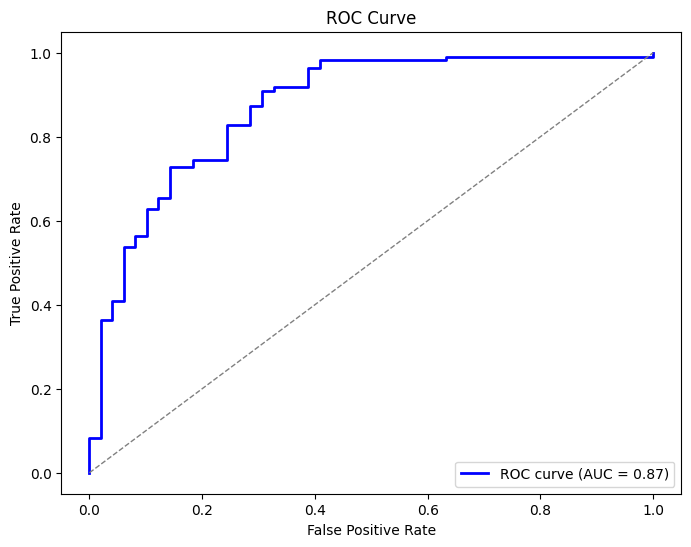

In [23]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pre_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.feature_selection import f_regression as fr
result = fr(X, Y)
f1_score = result[0]
p_value = result[1]

columns =  list(X.columns)

print(' Fetures : Feature, F-Score, P-Value')
for i in range(len(columns)):
    print(f'Feature: {columns[i]}, F-Score: {f1_score[i]:.4f}, P-Value: {p_value[i]:.4f}')

 Fetures : Feature, F-Score, P-Value
Feature: income, F-Score: 0.3902, P-Value: 0.5325
Feature: loanamt, F-Score: 1.4338, P-Value: 0.2317
Feature: married_Yes, F-Score: 4.7522, P-Value: 0.0297
Feature: ch_1.0, F-Score: 240.6633, P-Value: 0.0000


c:\Users\vyankateshgoski\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Univariate feature selection** is a method that selects the best features for a model by evaluating each feature individually against the target variable using statistical tests. It helps combat the **curse of dimensionality**—the problem where model performance degrades as the number of input features becomes too large. This selection process relies on **hypothesis testing** to determine if a statistically significant relationship exists between each feature and the target.

---
## 1. Univariate Feature Selection

#### What is it?
This is a feature selection process where each feature is assessed on its own, independent of the others. A statistical test is run for each feature against the target variable (e.g., `age` vs. `salary`, `gender` vs. `purchase_status`). Features are then ranked based on their test scores, and the top-ranking features are selected.

#### Curse of Dimensionality
This refers to various problems that arise when working with high-dimensional data (datasets with many features). As the number of features increases:
* The amount of data needed to support the model grows exponentially.
* The model becomes overly complex and is more likely to overfit.
* The distance between data points becomes less meaningful.
Univariate feature selection helps mitigate this by reducing the number of features to a more manageable and relevant subset.

#### Hypothesis Testing Relation
Univariate selection uses statistical hypothesis tests to score features. Each test is framed with:
* **Null Hypothesis ($H_0$)**: There is **no significant relationship** between the feature and the target.
* **Alternative Hypothesis ($H_1$)**: There **is a significant relationship**.

The test calculates a score and a **p-value**. If the p-value is below a certain threshold (usually 0.05), we reject the null hypothesis and conclude the feature is significant.

### F-Test (ANOVA)
The F-test, or Analysis of Variance (ANOVA), is used to check if the means of two or more groups are significantly different.

#### F-Test for Regression (Numerical Target)
* **Significance**: It tests if a numerical feature has a significant linear relationship with a numerical target.
* **Formula (Conceptual)**:
    $$
    F = \frac{\text{Variation explained by the feature}}{\text{Unexplained variation (residuals)}}
    $$
* **Example**: To see if `Years_of_Experience` significantly impacts `Salary`, the F-test checks if the variation in salary explained by experience is greater than the random variation. A high F-score suggests a strong relationship.

#### F-Test for Classification (Categorical Target)
* **Significance**: It tests if a numerical feature has a significant relationship with a categorical target.
* **Example**: To see if `Age` has a significant impact on whether a customer will `Default_on_Loan` (Yes/No), the F-test compares the mean age of the "Default" group to the mean age of the "No Default" group. If the means are significantly different, the feature is considered important.

#### Statistical Significance and Feature Selection
* **How to decide**: After running the F-test, you get an **F-score** and a **p-value**.
    * **F-score**: A higher F-score indicates a stronger relationship.
    * **p-value**: This is the probability of observing the data if the null hypothesis (no relationship) is true.
* **Rule for removing features**: If the **p-value is high** (e.g., > 0.05), you fail to reject the null hypothesis. This means there's no statistically significant relationship, and you can consider **removing that feature**. Features with low p-values are kept.

### Chi-Squared ($\chi^2$) Test of Independence
The Chi-Squared test is used to determine if there is a significant association between two **categorical variables**.

* **Significance**: It's the primary method for selecting **categorical features** for a **categorical target**.
* **Example**: Testing if `Marital_Status` (Married, Single, Divorced) is independent of `Purchased_Product` (Yes/No).

#### Steps for Chi-Squared Feature Selection
1.  **State Hypotheses**:
    * $H_0$: The feature and the target are independent (no relationship).
    * $H_1$: The feature and the target are dependent (there is a relationship).
2.  **Create a Contingency Table**: A table showing the frequency distribution of the variables (e.g., how many single people purchased the product vs. how many did not).
3.  **Calculate the Chi-Squared Statistic**: The test calculates the difference between the observed frequencies and the frequencies that would be expected if the variables were independent.
4.  **Determine p-value**: Based on the Chi-Squared statistic, a p-value is calculated.
5.  **Select Feature**: If the p-value is low (< 0.05), you reject the null hypothesis and conclude the feature is dependent on the target, meaning it's a useful feature to keep.

---
## 2. Most Common Feature Selection Transforms

In libraries like Scikit-learn, these statistical tests are wrapped in easy-to-use functions.

* `GenericUnivariateSelect`: A configurable selector that allows different selection strategies. More commonly, you use its simpler wrappers:
    * `SelectKBest`: Selects a fixed number (`k`) of the top-scoring features.
    * `SelectPercentile`: Selects the top features based on a specified percentile.

To use these, you must provide a `score_func` to tell it which statistical test to run.

#### Common `score_func` Options:
* `f_regression`: Use this for a **regression** task (numerical target). It runs an F-test.
* `f_classif`: Use this for a **classification** task (categorical target) when you are testing **numerical features**. It also runs an F-test (ANOVA).
* `chi2`: Use this for a **classification** task (categorical target) when you are testing **categorical features**. It runs the Chi-Squared test.

In [26]:
# univariate feature selection
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, Y)


# f score and p value for new features
f1_score_new = selector.scores_
p_value_new = selector.pvalues_
print(' Fetures : Feature, F-Score, P-Value')
for i in range(len(X.columns)):
    print(f'Feature: {X.columns[i]}, F-Score: {f1_score_new[i]:.4f}, P-Value: {p_value_new[i]:.4f}')    


# selected columns
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns)



 Fetures : Feature, F-Score, P-Value
Feature: income, F-Score: 0.3902, P-Value: 0.5325
Feature: loanamt, F-Score: 1.4338, P-Value: 0.2317
Feature: married_Yes, F-Score: 4.7522, P-Value: 0.0297
Feature: ch_1.0, F-Score: 240.6633, P-Value: 0.0000
Selected Features: Index(['married_Yes', 'ch_1.0'], dtype='object')


c:\Users\vyankateshgoski\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.feature_selection import SelectPercentile, f_regression

selector = SelectPercentile(score_func=f_regression,percentile=30)
X_new = selector.fit_transform(X, Y)


# f score and p value for new features
f1_score_new = selector.scores_
p_value_new = selector.pvalues_
print(' Fetures : Feature, F-Score, P-Value')
for i in range(len(X.columns)):
    print(f'Feature: {X.columns[i]}, F-Score: {f1_score_new[i]:.4f}, P-Value: {p_value_new[i]:.4f}')    


# selected columns
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns)


 Fetures : Feature, F-Score, P-Value
Feature: income, F-Score: 0.3902, P-Value: 0.5325
Feature: loanamt, F-Score: 1.4338, P-Value: 0.2317
Feature: married_Yes, F-Score: 4.7522, P-Value: 0.0297
Feature: ch_1.0, F-Score: 240.6633, P-Value: 0.0000
Selected Features: Index(['ch_1.0'], dtype='object')


c:\Users\vyankateshgoski\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Generic Univerisate Selection
from sklearn.feature_selection import GenericUnivariateSelect
selectorg1 =  GenericUnivariateSelect(score_func=f_regression,mode='k_best',param=2)
selectorg1.fit_transform(X,Y)

c:\Users\vyankateshgoski\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]], shape=(529, 2))